#### After running main `<size>_<name>_<transform>_<channel>.ipynb` notebook, use this to regenerate plots as needed.

In [1]:
DATA_NAME = 'approx1e5-spaceNet-fourier-blue' # size-name-transform-channel
import git
from pathlib import Path
import os

ROOT_DIR = Path(git.Repo('.', search_parent_directories=True).working_tree_dir)
path_dict = dict(zip(['size', 'name', 'transform', 'channel'], DATA_NAME.split("-")))
CWD = os.path.join(ROOT_DIR, os.path.join("results", "case-studies", path_dict['name'], path_dict['transform'], path_dict['size'], path_dict['channel']))
assert CWD == os.getcwd()

os.chdir(os.path.join(ROOT_DIR, "utilities"))
from testing import * # If MATLAB is not installed, open utilities and set to False
from plotting import *
os.chdir(CWD)
np.random.seed(0)

GROUP = 'layer' if path_dict['transform'] == 'wavelet' else ('band' if path_dict['transform'] == 'fourier' else 'group')
group_data_map = pd.read_pickle(os.path.join(ROOT_DIR, "transformed-data", f'{DATA_NAME}.pickle'))
group_total_samples = pd.read_pickle(os.path.join(ROOT_DIR, "transformed-data", f'{DATA_NAME}-size.pickle'))
GROUPS = np.arange(2, sorted(group_data_map)[-1] + 1)[::3]

In [6]:
n_bootstrap = int(1e4)
bootstrap_size = int(1e5)
ci = 0.99
master_df = pd.read_csv(os.path.join(CWD, "CSVs", "master_df.csv"), index_col=GROUP)
var_kurt_df = pd.read_csv(os.path.join(CWD, "CSVs", f'initial_grid_bootstrap{n_bootstrap}_{bootstrap_size}_ci{ci}.csv'), index_col=GROUP)
master_df

,obs_var,var_lower,var_upper,obs_kurt,kurt_lower,kurt_upper,total_samples,initial_r,initial_eta,kstest_stat_initial,...,param_gaussian,kstest_stat_gaussian,kstest_pval_gaussian,param_laplace,kstest_stat_laplace,kstest_pval_laplace,param_t,kstest_stat_t,kstest_pval_t,kstest_pval_gengamma
band,,,,,,,,,,,,,,,,,,,,,
2,1.869573e+08,1.805405e+08,1.936169e+08,6.890562,5.705554,8.191423,47614.0,0.16,1.6,0.015444,...,50.0,0.481435,0.0,50.0,0.471615,0.0,50.0,0.458737,0.0,4.958000e-07
5,7.474840e+07,7.227341e+07,7.736376e+07,15.030489,11.519076,19.477760,102030.0,0.16,1.1,0.014587,...,50.0,0.471551,0.0,50.0,0.459973,0.0,50.0,0.445130,0.0,1.984900e-15
8,2.025597e+07,1.965442e+07,2.090655e+07,12.860015,9.832646,16.874906,326496.0,0.16,0.6,0.011405,...,50.0,0.457751,0.0,50.0,0.440535,0.0,50.0,0.422552,0.0,3.389600e-33
11,4.711756e+06,4.575736e+06,4.856241e+06,11.616290,8.750675,15.693161,904666.0,0.18,1.0,0.013080,...,50.0,0.434929,0.0,50.0,0.409335,0.0,50.0,0.388061,0.0,2.033000e-107
14,1.357398e+06,1.315806e+06,1.403579e+06,14.224839,8.318135,24.720621,2727602.0,0.18,0.5,0.010025,...,50.0,0.398262,0.0,50.0,0.363685,0.0,50.0,0.340488,0.0,6.474400e-179
17,3.354883e+05,3.199574e+05,3.579159e+05,44.881534,10.012840,124.177167,8298440.0,0.20,0.7,0.009726,...,50.0,0.336236,0.0,50.0,0.292712,0.0,50.0,0.268723,0.0,0.000000e+00
20,5.783251e+04,5.149025e+04,6.947527e+04,406.070486,11.174704,915.552951,25140192.0,0.23,0.9,0.006876,...,50.0,0.214464,0.0,50.0,0.168075,0.0,50.0,0.143630,0.0,1.279300e-72
23,1.338629e+04,1.271203e+04,1.448674e+04,64.435376,6.781557,164.295968,65734528.0,0.27,1.5,0.004493,...,50.0,0.109092,0.0,50.0,0.066980,0.0,50.0,0.040763,0.0,0.000000e+00


####
Band  2


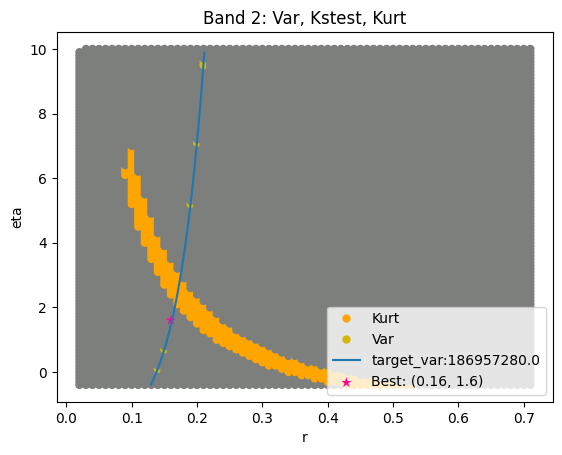

####
Band  5


c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\utilities\testing.py:842: RuntimeWarning: invalid value encountered in scalar divide
  return scipy.special.gamma((eta+2.5)/r) / scipy.special.gamma((eta+1.5)/r)


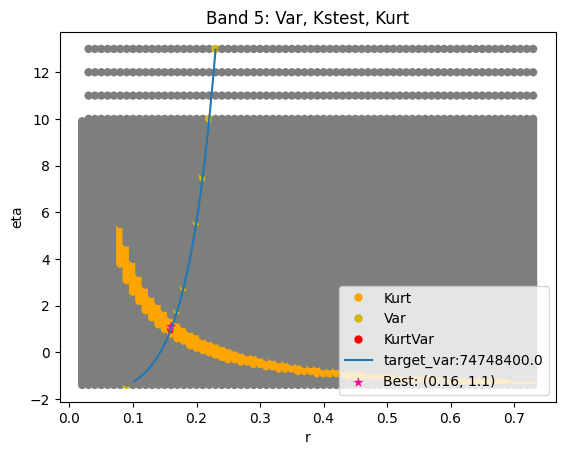

####
Band  8


c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\utilities\testing.py:842: RuntimeWarning: invalid value encountered in scalar divide
  return scipy.special.gamma((eta+2.5)/r) / scipy.special.gamma((eta+1.5)/r)


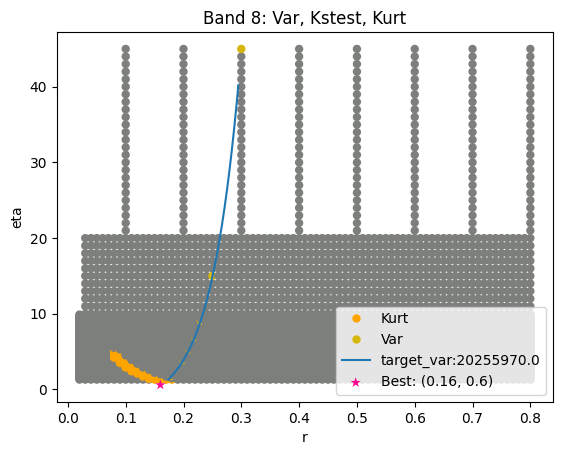

####
Band  11


c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\utilities\testing.py:842: RuntimeWarning: invalid value encountered in scalar divide
  return scipy.special.gamma((eta+2.5)/r) / scipy.special.gamma((eta+1.5)/r)


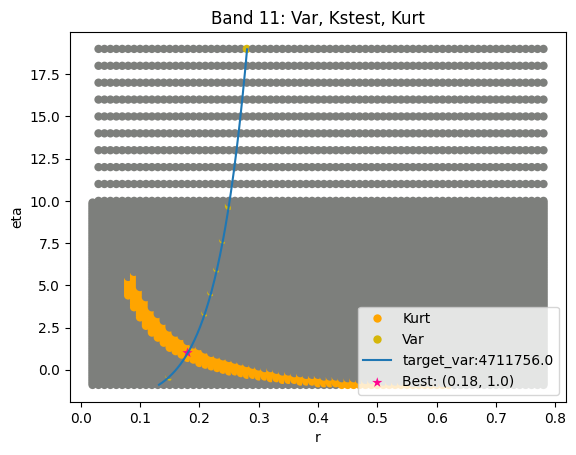

####
Band  14


KeyboardInterrupt: 

In [10]:
group_cdf_df_dict = pd.read_pickle(os.path.join(CWD, "cache", "group_cdf_df_dict_full.pickle"))
for i, group in enumerate(GROUPS):
    print(f"####\n{GROUP.capitalize()} ", group)
    cols = ['pass_var', 'pass_kstest', 'pass_kurt']
    fig = combo_test_plot(group_cdf_df_dict[group], cols, 
                            plot_name=f"{GROUP.capitalize()} {group}: {', '.join([col[5:].capitalize() for col in cols])}", 
                            target_var = master_df.loc[group, 'obs_var'],
                            best_param = (master_df.loc[group, 'initial_r'], master_df.loc[group, 'initial_eta']))
    fig.figure.savefig(os.path.join(CWD, "plots", f"full_grid_search_combo_plot_layer{group}.jpg"), bbox_inches = 'tight', dpi=600)

Band 2


100%|██████████| 441/441 [00:05<00:00, 87.83it/s] 


Finding Minimum after computing 441 CDFs
Iter 1 band 2 best parameters: ((0.16, 1.53), 0.0126345164900742)


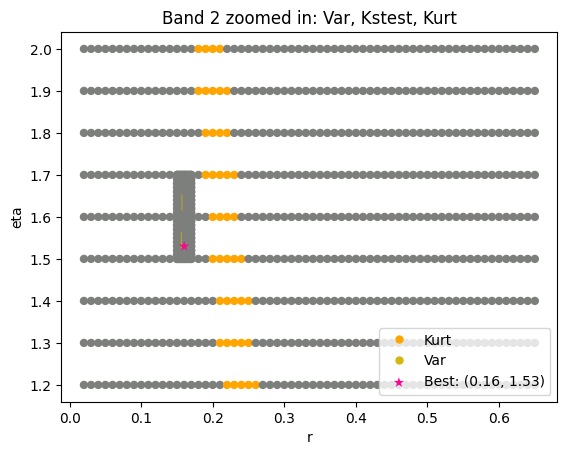

Band 5


100%|██████████| 441/441 [00:11<00:00, 38.20it/s]


Finding Minimum after computing 441 CDFs
Iter 1 band 5 best parameters: ((0.161, 1.09), 0.0130094803422199)


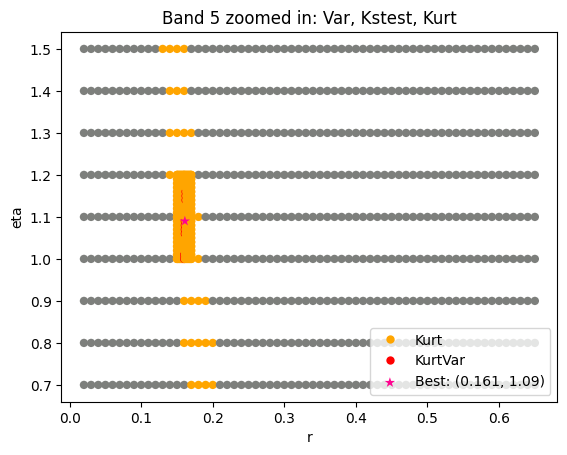

Band 8


100%|██████████| 420/420 [00:09<00:00, 45.26it/s]


Finding Minimum after computing 420 CDFs
Iter 1 band 8 best parameters: ((0.159, 0.54), 0.0107490954161013)


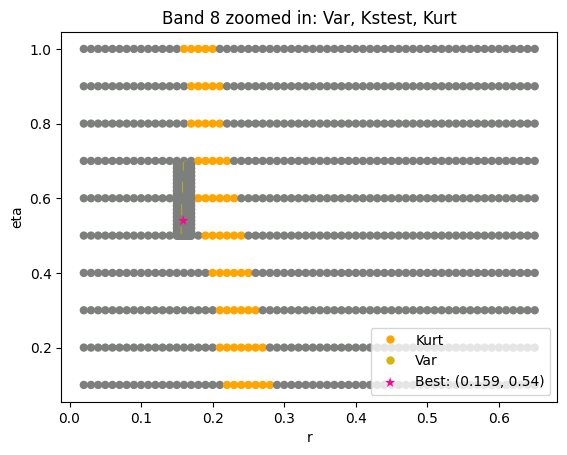

Band 11


 47%|████▋     | 206/441 [00:04<00:04, 49.65it/s]


KeyboardInterrupt: 

In [14]:
NUM_ITERS = dict(zip(GROUPS, np.ones(len(GROUPS)).astype(int)))

for group in GROUPS: 
    print(f"{GROUP.capitalize()} {group}")
    sample = group_data_map[group]

    for d in range(1, NUM_ITERS[group] + 1):
        if d == 1:
            initial_r, initial_eta = master_df.loc[group, 'initial_r'], master_df.loc[group, f'initial_eta']
        else:
            initial_r, initial_eta = master_df.loc[group, f'iter{d - 1}_r'], master_df.loc[group, f'iter{d - 1}_eta']

        r_granularity = r_granularity * 10.0**(-d+1) 
        eta_granularity = eta_granularity * 10.0**(-d+1) 

        cdfs_dict = combine_pickles(os.path.join(CWD, "groupCDFs", f'{GROUP}{group}'))
        ksstats, best_param, kstest_stat = gridsearch(sample, cdfs_dict, debug=True)

        temp_df = create_kurt_var_ksstat_df(cdfs_dict)
        temp_df = add_tests_to_df(cdfs_df=temp_df, group=group, var_kurt_df=master_df, ksstats=ksstats)
        group_cdf_df_dict[group] = pd.concat([group_cdf_df_dict[group], temp_df])

        print(f"Iter {d} {GROUP} {group} best parameters: {best_param, master_df.loc[group, f'kstest_stat_iter{d}']}")

    temp_df = group_cdf_df_dict[group]
    eps = 0.5
    filtered_df = temp_df[(temp_df['r'] > master_df.loc[group, 'initial_r'] - eps) & 
                    (temp_df['r'] < master_df.loc[group, 'initial_r'] + eps) &
                    (temp_df['eta'] > master_df.loc[group, 'initial_eta'] - eps) &
                    (temp_df['eta'] < master_df.loc[group, 'initial_eta'] + eps)]
    
    cols = ['pass_var', 'pass_kstest', 'pass_kurt']
    fig = combo_test_plot(filtered_df, cols, 
                            plot_name=f"{GROUP.capitalize()} {group} zoomed in: {', '.join([col[5:].capitalize() for col in cols])}",
                            best_param=(master_df.loc[group, 'best_r'], master_df.loc[group, f'best_eta']))
    fig.figure.savefig(os.path.join(CWD, "plots", f"optimized_full_grid_search_combo_plot_layer{group}.jpg"), bbox_inches = 'tight', dpi=600)

master_df

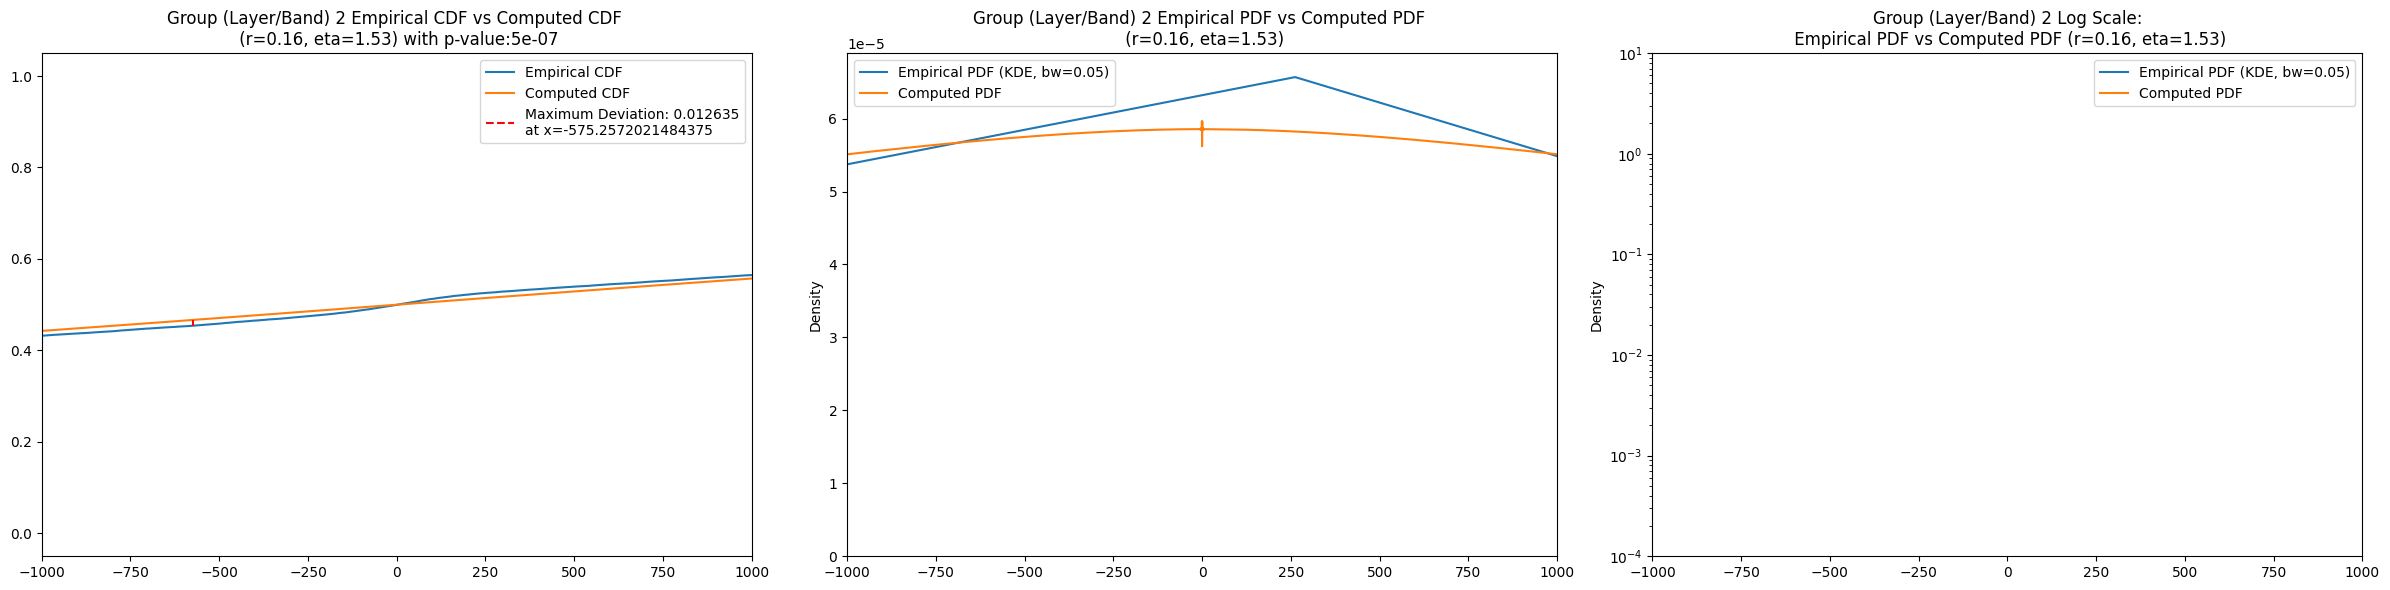

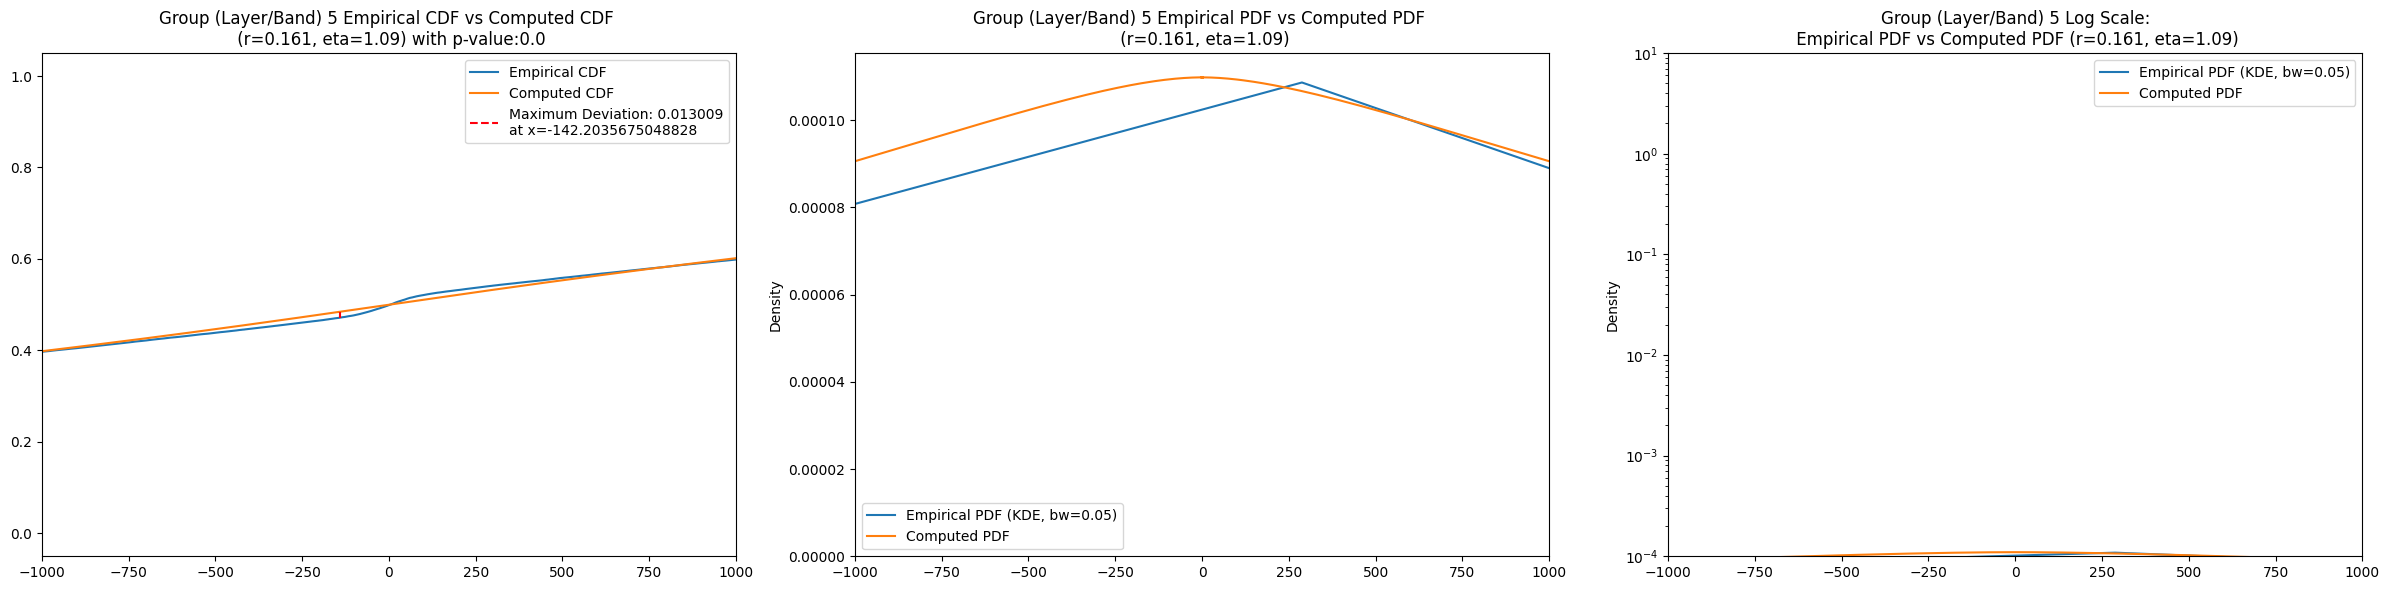

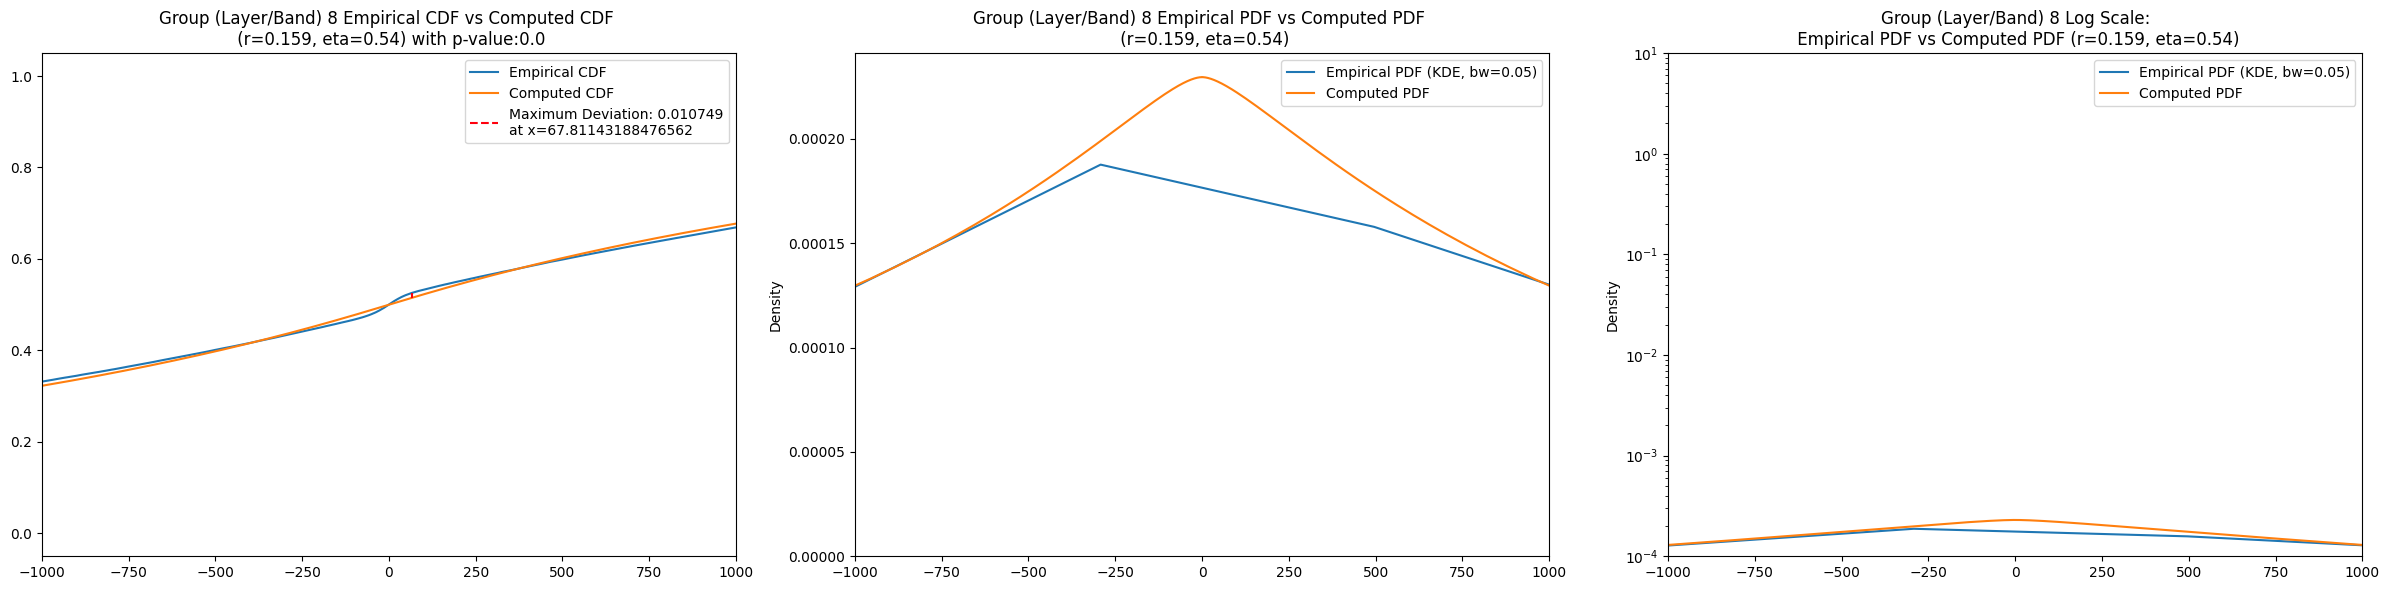

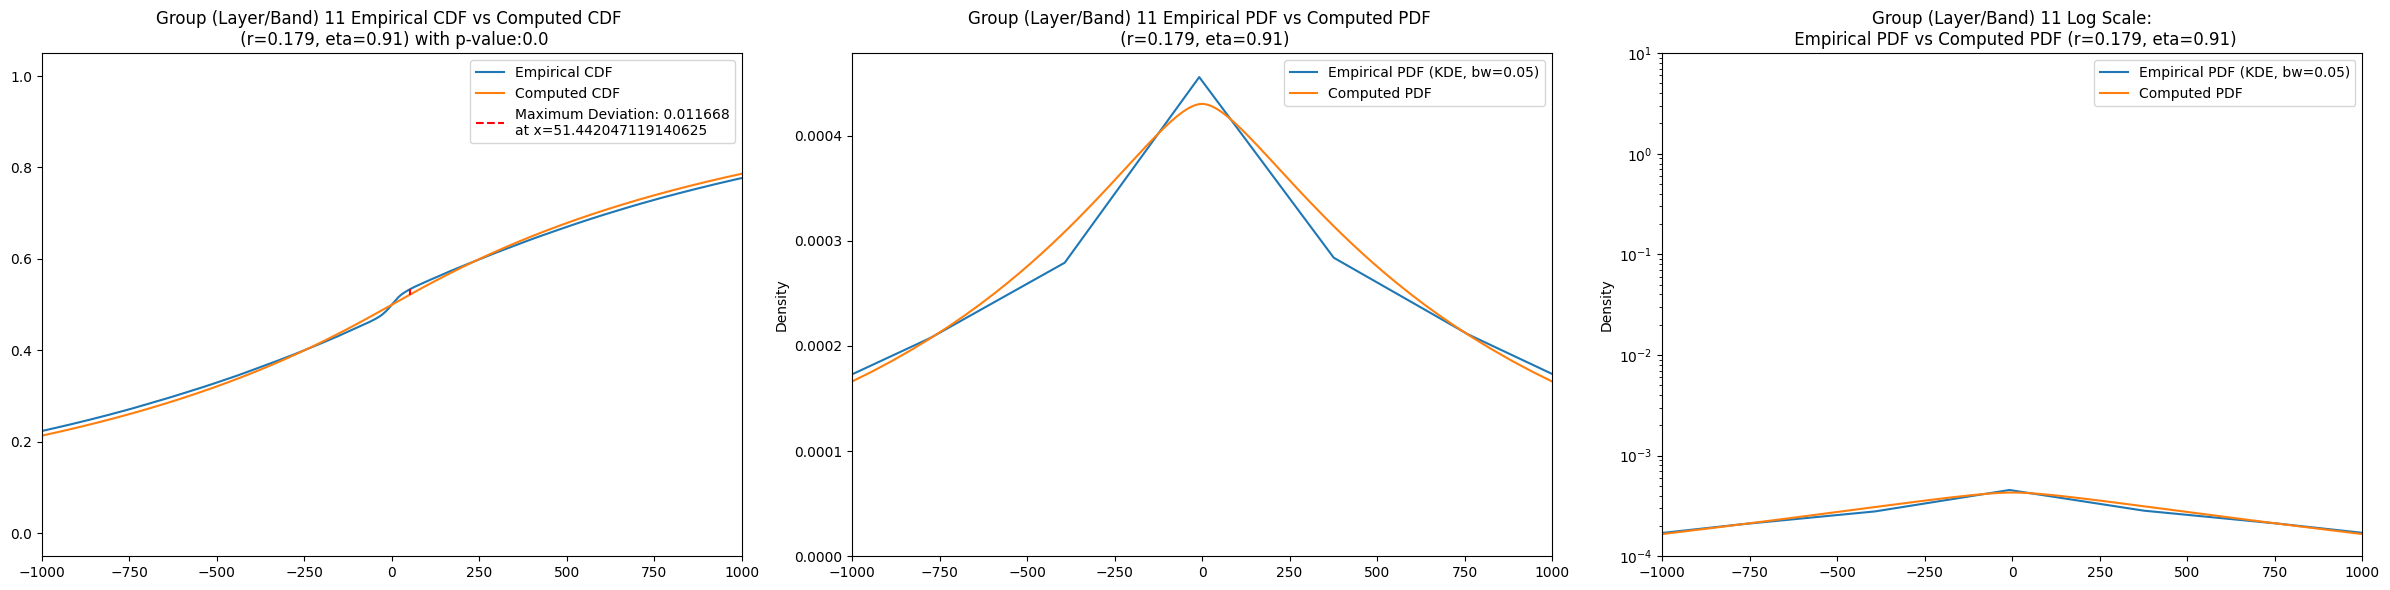

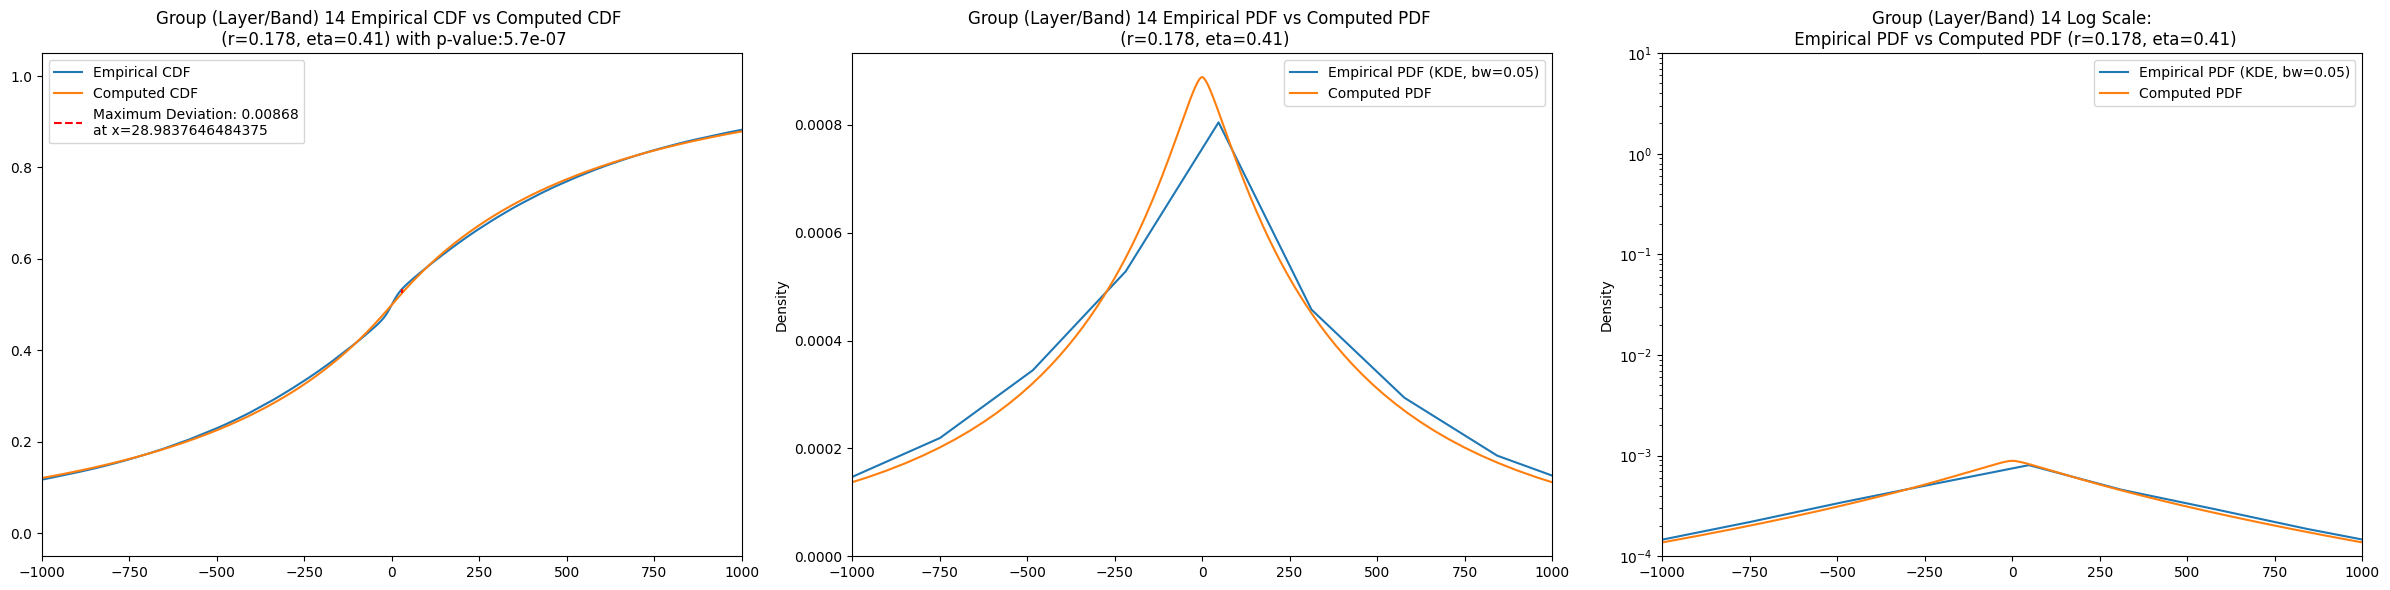

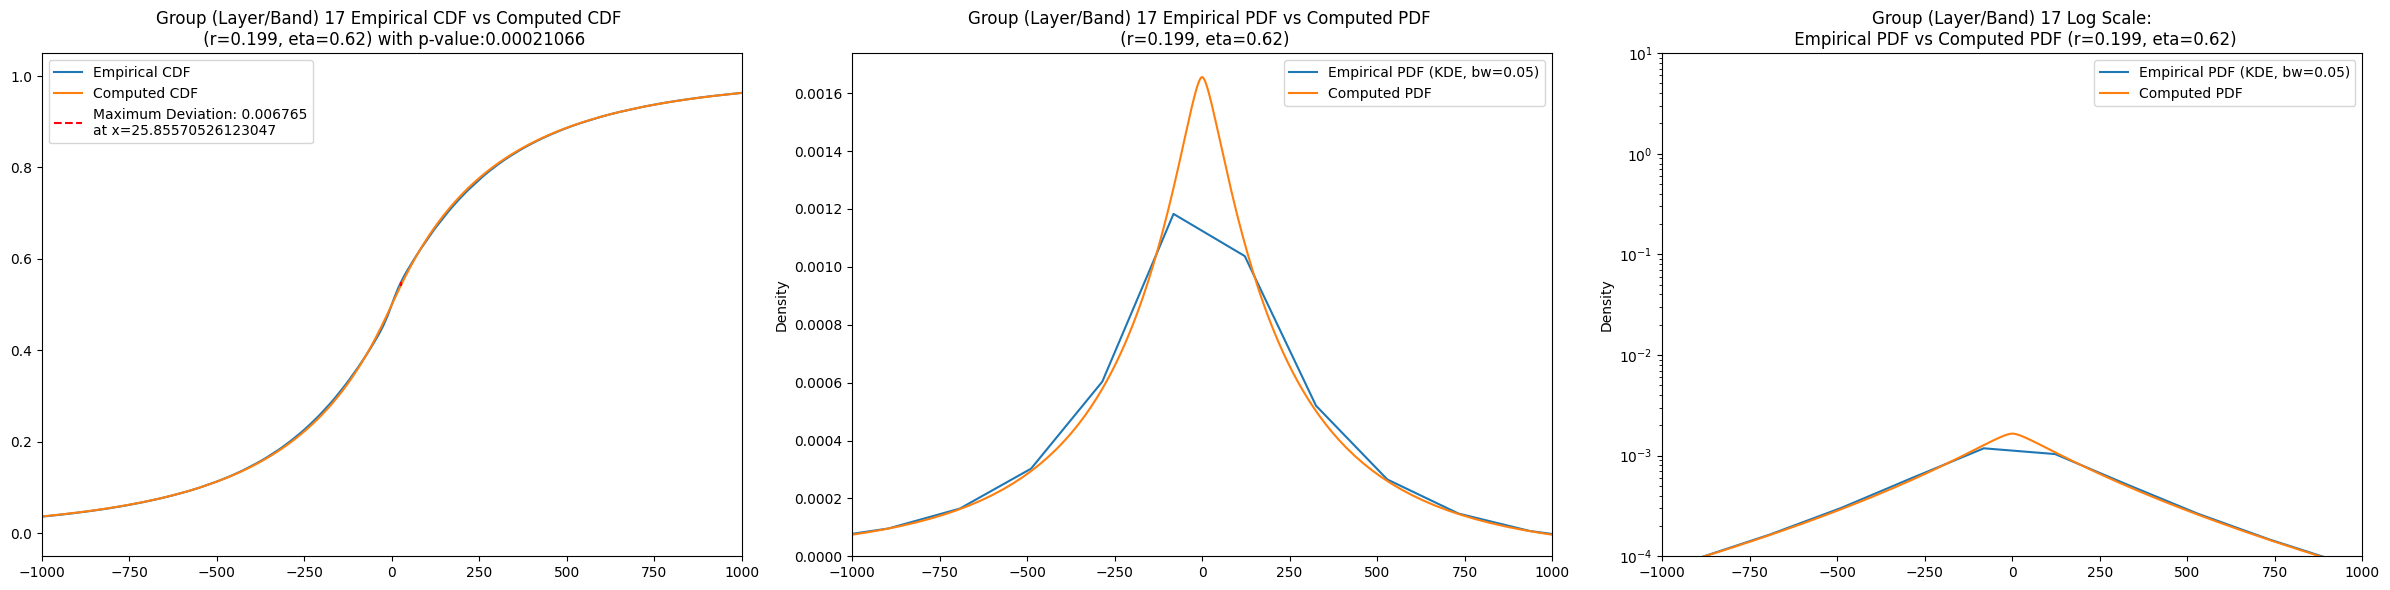

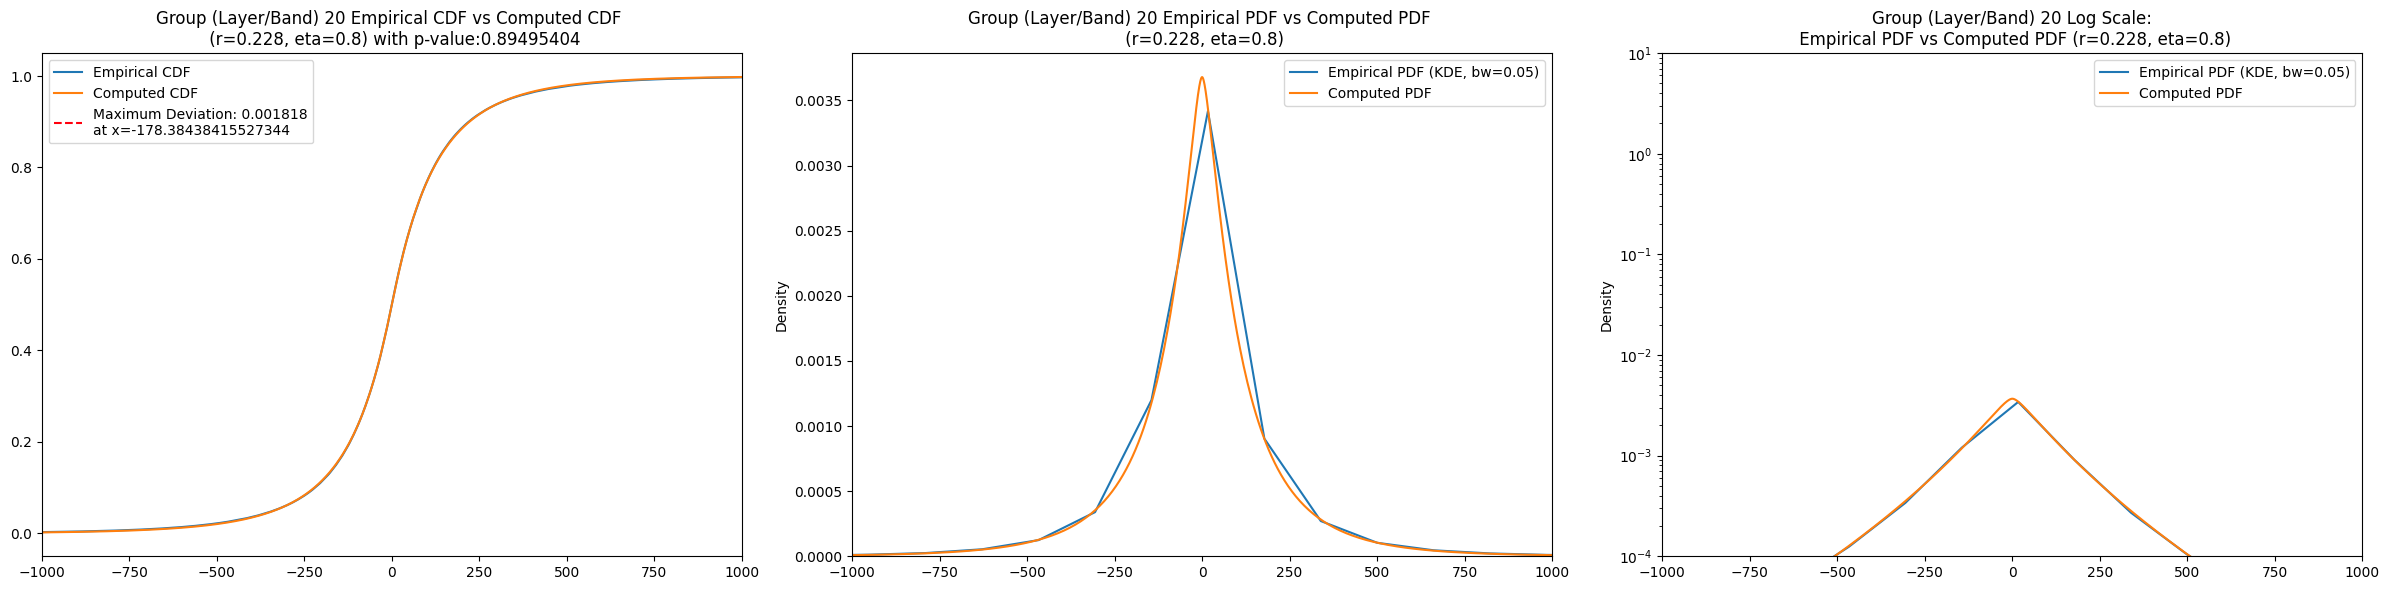

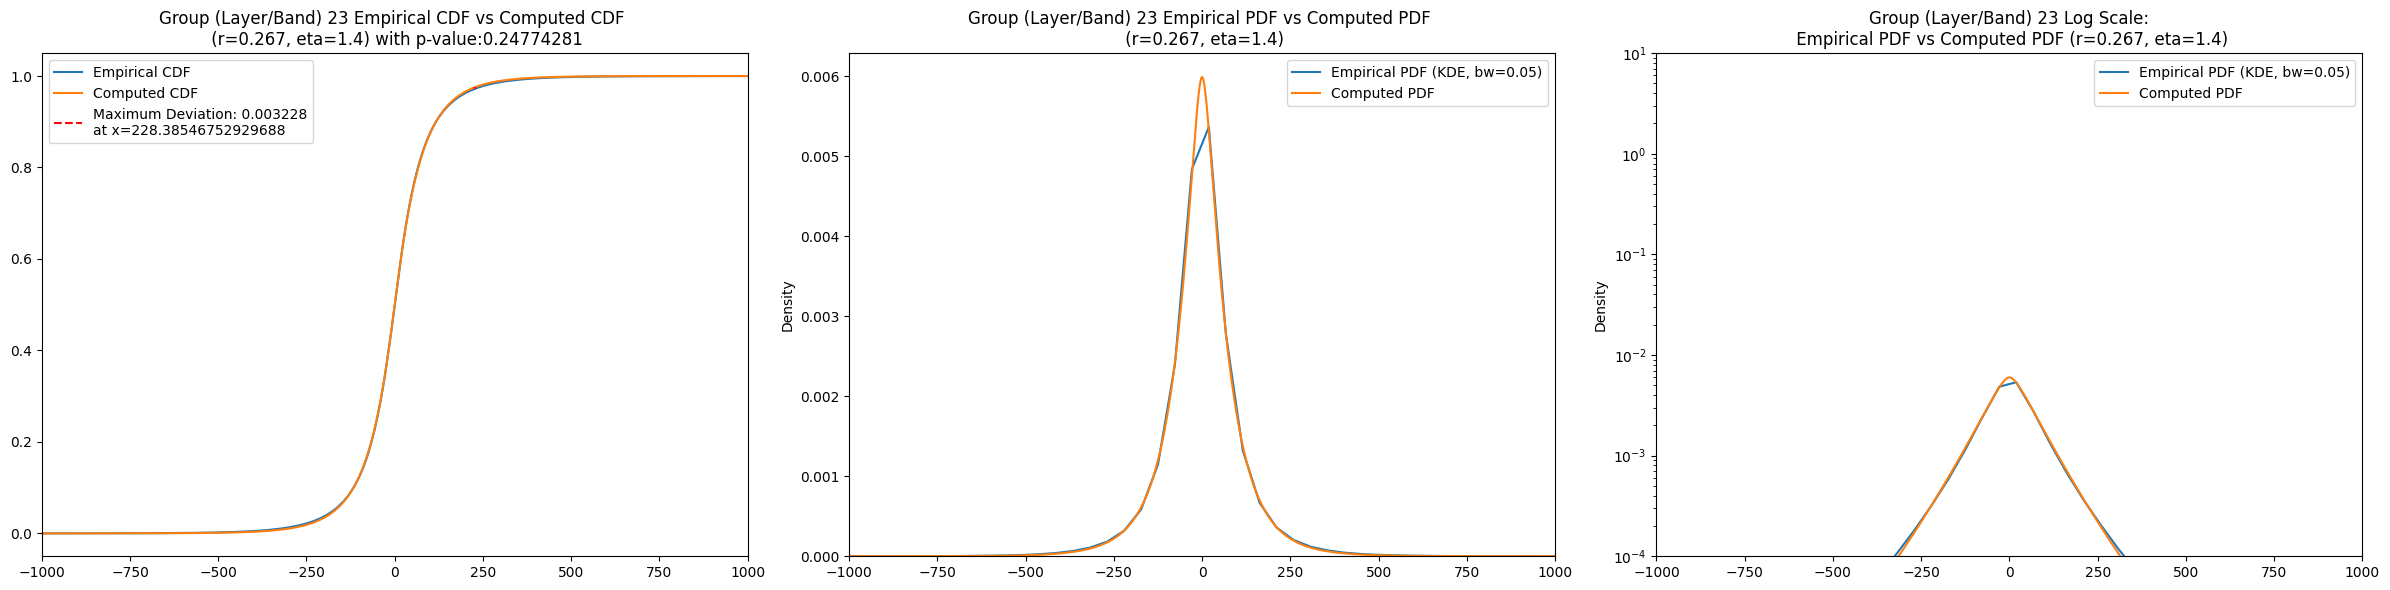

In [15]:
for group in GROUPS:
    group_info = master_df.loc[group]
    fig = visualize_cdf_pdf(sample = group_data_map[group], 
                    params = (group_info['best_r'], group_info['best_eta']), 
                    log_scale = True,
                    group = group,
                    interval = (-1000, 1000))
    #fig.savefig(os.path.join(CWD, "plots", f'compare_cdf_pdf_layer_{group}.jpg'), bbox_inches = 'tight', dpi = 600)

In [16]:
master_df

,obs_var,var_lower,var_upper,obs_kurt,kurt_lower,kurt_upper,total_samples,initial_r,initial_eta,kstest_stat_initial,...,param_gaussian,kstest_stat_gaussian,kstest_pval_gaussian,param_laplace,kstest_stat_laplace,kstest_pval_laplace,param_t,kstest_stat_t,kstest_pval_t,kstest_pval_gengamma
band,,,,,,,,,,,,,,,,,,,,,
2,1.869573e+08,1.805405e+08,1.936169e+08,6.890562,5.705554,8.191423,47614.0,0.16,1.6,0.015444,...,50.0,0.481435,0.0,50.0,0.471615,0.0,50.0,0.458737,0.0,4.958000e-07
5,7.474840e+07,7.227341e+07,7.736376e+07,15.030489,11.519076,19.477760,102030.0,0.16,1.1,0.014587,...,50.0,0.471551,0.0,50.0,0.459973,0.0,50.0,0.445130,0.0,1.984900e-15
8,2.025597e+07,1.965442e+07,2.090655e+07,12.860015,9.832646,16.874906,326496.0,0.16,0.6,0.011405,...,50.0,0.457751,0.0,50.0,0.440535,0.0,50.0,0.422552,0.0,3.389600e-33
11,4.711756e+06,4.575736e+06,4.856241e+06,11.616290,8.750675,15.693161,904666.0,0.18,1.0,0.013080,...,50.0,0.434929,0.0,50.0,0.409335,0.0,50.0,0.388061,0.0,2.033000e-107
14,1.357398e+06,1.315806e+06,1.403579e+06,14.224839,8.318135,24.720621,2727602.0,0.18,0.5,0.010025,...,50.0,0.398262,0.0,50.0,0.363685,0.0,50.0,0.340488,0.0,6.474400e-179
17,3.354883e+05,3.199574e+05,3.579159e+05,44.881534,10.012840,124.177167,8298440.0,0.20,0.7,0.009726,...,50.0,0.336236,0.0,50.0,0.292712,0.0,50.0,0.268723,0.0,0.000000e+00
20,5.783251e+04,5.149025e+04,6.947527e+04,406.070486,11.174704,915.552951,25140192.0,0.23,0.9,0.006876,...,50.0,0.214464,0.0,50.0,0.168075,0.0,50.0,0.143630,0.0,1.279300e-72
23,1.338629e+04,1.271203e+04,1.448674e+04,64.435376,6.781557,164.295968,65734528.0,0.27,1.5,0.004493,...,50.0,0.109092,0.0,50.0,0.066980,0.0,50.0,0.040763,0.0,0.000000e+00
